# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data= pd.read_csv('water_potability.csv')
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.shape

(3276, 10)

In [ ]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
data['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


In [ ]:
mean_ph=data['ph'].mean()
mean_Sulfate=data['Sulfate'].mean()
mean_Trihalomethanes=data['Trihalomethanes'].mean()
print(mean_ph,mean_Sulfate,mean_Trihalomethanes)

7.080794504276835 333.7757766108135 66.39629294676803


In [ ]:
#data['ph'].fillna(value=mean_ph, inplace=True)
data['ph'] = data['ph'].fillna(value=mean_ph)
data['Sulfate'] = data['Sulfate'].fillna(value=mean_Sulfate)
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=mean_Trihalomethanes)
data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


Plot the Data Appropriately

In [ ]:
# generate 2d classification dataset
X=data.drop(['Potability'],axis=1)
y=data['Potability']

In [ ]:
#Normlising features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_saleld=scaler.fit_transform(X)

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Each Memeber Defines their model Here

In [ ]:
#Model Definition by member 1
def model_name_of_student():

  return
from tensorflow.keras import layers, regularizers, callbacks

epochs = 50
batch_size= 128
verbose= 1
validation_split= 0.2
#dropout =0.3
learning_rate=0.01
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(learning_rate)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid'),

])
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

early_stopping=callbacks.EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5296 - loss: 959.0208 - val_accuracy: 0.4052 - val_loss: 19.1425
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4847 - loss: 27.5379 - val_accuracy: 0.5948 - val_loss: 1.8237
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5954 - loss: 4.1927 - val_accuracy: 0.5948 - val_loss: 1.8227
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5741 - loss: 2.2589 - val_accuracy: 0.5948 - val_loss: 1.8065
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5970 - loss: 1.8883 - val_accuracy: 0.5948 - val_loss: 1.7887
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6017 - loss: 1.8509 - val_accuracy: 0.5948 - val_loss: 1.7716
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5955 - loss: 1.8025 - val_accuracy: 0.5948 - val_loss: 1.7577
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6234 - loss: 1.7579 - val_accuracy: 0.5948 

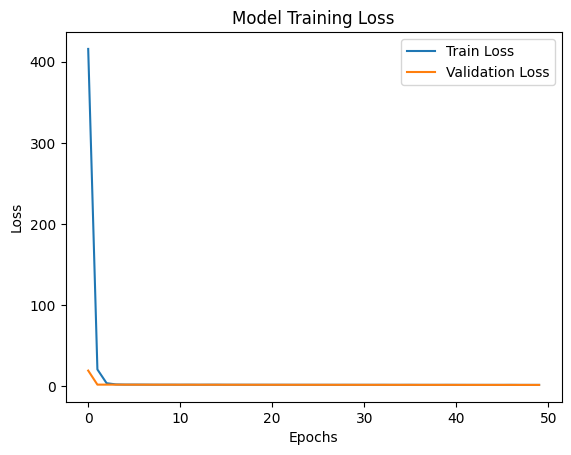

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=validation_split,
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose,
    callbacks=[early_stopping]
)

# Evaluate Model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

# Plot Training History
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss')
plt.show()

In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

In [ ]:

#Reuse this codeif necessary
#fit model
history = model.fit(X, y, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()